# Lecture 04

Use with the covid data set for:

* Learning Python dataframe
* Bootstrap Sampling
* Hypothesis Testing


In [4]:
import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Visualizing Multiple Data Sets

In [5]:
import pandas as pd

df = pd.read_csv( './covid-merged.csv' ) # INPUT THE FILE
df.set_index('state', inplace=True) # USING STATE TO INDEX THE DATA

In [6]:
df.head()

,cases,population,gdp,urban
state,,,,
Alabama,7068,4903185,230750.1,59.04
Alaska,353,731545,54674.7,66.02
Arizona,7648,7278717,379018.8,89.81
Arkansas,3281,3017804,132596.4,56.16
California,50470,39512223,3205000.1,94.95


In [7]:
# Normalize the data so avoid bias -- high case number is often due to high population
df['cases_norm'] = df['cases'] / df['population'] * 1000 
df['gdp_norm'] = df['gdp'] / df['population'] * 1000 
# show header and first few lines of the data
df.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
California,50470,39512223,3205000.1,94.95,1.277326,81.114143


# Key Concepts in Hypothesis Testing:

**Null Hypothesis ($H_0$):**
* This is the default or baseline assumption.
* It often states that there is no effect, no difference, or no relationship in the population.
* Example: 
1. The coin is a fair coin.
2. "The average COVID infection rate is  **NOT** related to GDP (Gross Domestic Product) of the state. ” 

**Alternative Hypothesis ($H_1$):**
* This represents the statement you want to test.
* It is the opposite of the null hypothesis.

* Example: 
1. The coin is **NOT** a fair coin.
2. "The average COVID infection rate is related to GDP (Gross Domestic Product) of the state. " 
     e.g. a increase in GDP may be related to a lower/higher infection rate.

**Test statistics**
 A value calculated from the sample data that summarizes the evidence against the null hypothesis.

e.g. 

1. The number of heads in the repeated coin flips.
2. The difference in the infection rates between states with higer gdp and states with lower gdp.
 
**P-value:** 
The probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming $H_0$ is true.

**Choose a Significance Level ($\alpha$):**
Commonly set at 0.05.

**Decision: To reject the null hypothesis or not**
* Reject $H_0$ if p-value < $\alpha$.
* Otherwise, fail to reject $H_0$.

### Partitioning Based on GDP

The gross domestic product (GDP) provides a measure of how affluent a state is.

Let's use it to partition into groups of equal size -- so we will use the **median**.
 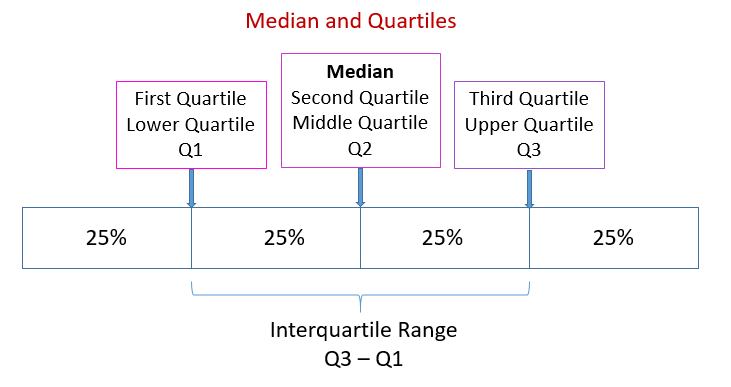

In [8]:
m_gdp = df['gdp_norm'].median()
m_gdp

61.04737129841516

To partition the data, we introduce a new dataframe method called `query()` 

In [9]:
#DEMO
help(df.query)

Help on method query in module pandas.core.frame:

query(expr: 'str', inplace: 'bool' = False, **kwargs) method of pandas.core.frame.DataFrame instance
    Query the columns of a DataFrame with a boolean expression.
    
    Parameters
    ----------
    expr : str
        The query string to evaluate.
    
        You can refer to variables
        in the environment by prefixing them with an '@' character like
        ``@a + b``.
    
        You can refer to column names that are not valid Python variable names
        by surrounding them in backticks. Thus, column names containing spaces
        or punctuations (besides underscores) or starting with digits must be
        surrounded by backticks. (For example, a column named "Area (cm^2)" would
        be referenced as ```Area (cm^2)```). Column names which are Python keywords
        (like "list", "for", "import", etc) cannot be used.
    
        For example, if one of your columns is called ``a a`` and you want
        to sum it

In [10]:
lower_gdp = df.query('gdp_norm < @m_gdp')
lower_gdp.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
Florida,33683,21477737,1126510.3,91.16,1.568275,52.450139
Georgia,25431,10617423,634137.5,75.07,2.395214,59.726122


In [11]:
higher_gdp = df.query('gdp_norm >= @m_gdp')
higher_gdp.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
California,50470,39512223,3205000.1,94.95,1.277326,81.114143
Colorado,15207,5758736,400863.4,86.15,2.640684,69.609616
Connecticut,27700,3565287,290703.0,87.99,7.769361,81.537054
Delaware,4734,973764,77879.4,83.30,4.861548,79.977695


In [12]:
#DEMO
len(lower_gdp), len(higher_gdp)

(25, 25)

## Histogram
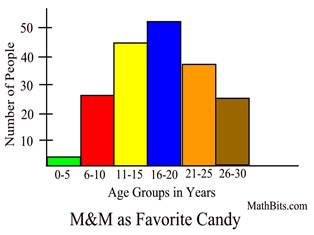




Let's compare using histograms:

Text(0, 0.5, 'count of states')

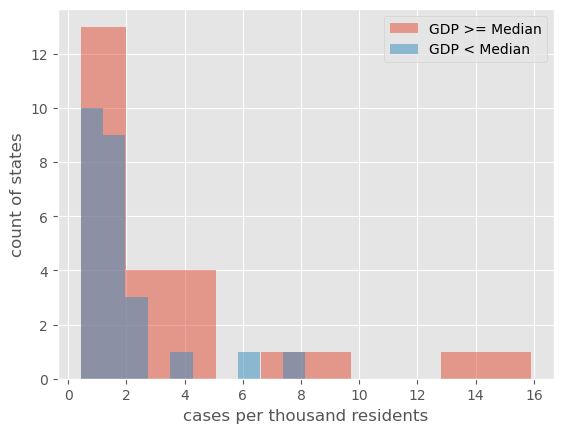

In [16]:
#DEMO 
plt.hist(higher_gdp['cases_norm'], alpha=0.5, label = 'GDP >= Median')
plt.hist(lower_gdp['cases_norm'], alpha=0.5, label = 'GDP < Median')
plt.legend()
plt.xlabel('cases per thousand residents')
plt.ylabel('count of states')


**DISCUSSION**

The histogram shows that states with GDPs per capita over the median have higher case counts in general (for instance, the larger bars in the range 2-5), as well as larger maximum values (above 8).  Unfortunately, the data does not provide any insight into why that might be the case. One reason might be that states with higher GDPs may have larger network effects, where more of the population interacts with a larger number of people. For instance, such states may have more of their population employed in office jobs and more likely to travel for their work. 

When an effect is observed visually, we usually want to quantify that effect in some way and then test whether any observed difference is "real"

# Null Hypothesis Testing with Real Data

In [ ]:
# Magic cell to make MPL save to both png and pdf
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

When dealing with data from different groups, we will generally observe differences. 

At this point, we wish to understand whether the observed difference is "significant": is this difference likely to be a property of the underlying groups, or is it just caused by random variations in the data?


* INTUITION: consider again coin flip, if you flip it twice and observed 'H', 'H', how confident you are in rejecting the null hypothesis (it is a fair coin)?

The **number of samples of random phenomena** has a significant impact on how **accurately we can estimate those phenomena**. When it comes to real data, the problem is amplified because we do not know the ground-truth characterization of the random phenomena producing the data. 



<div class="alert alert-info">
    <b>Statistical hypothesis</b>
    
**Statistical hypothesis** is an explanation for phenomena observed in a data set that can be formally tested using the data.
</div>


**Null hypothesis (for multiple groups)**
>   The *null hypothesis* is that there is no real difference between the two data sets, and any differences are just based on random sampling from the underlying population.


Usually denoted by $H_0$

*Intuitively, the zero can be read as implying zero difference between the populations (in the feature being compared).*

**Alternate hypothesis ($H_a$)**
>  the feature being measured actually comes from random distributions that differ by group.

We will conduct a form of *binary hypothesis test*:

**Binary hypothesis test**
>   A binary hypothesis test is a statistical test that decides between two competing statistical hypotheses.

Usually, $H_a$ cannot be tested directly because we do not know ahead of time *how* the underlying phenomena differ. 

Instead, we conduct tests by assuming $H_0$ is true, called a *null hypothesis test*: 

**Null hypothesis significance test (NHST)**
>   A type of binary hypothesis  test that estimates the probability of observing such a large value of the  statistic under the condition that some null hypothesis, $H_0$, is true.

##  Model-free NHST 
>   No assumption is made about the data fitting to some statistical model; analytical  methods are usually not possible. 

In model-free methods, techniques must be applied to the data itself to answer questions about the data. 

We want to draw data from the distribution of the data under $H_0$, but we **don't have a model**. 

- use  *resampling* to approximate drawing from the distribution of the data under $H_0$:

**resampling**

>   Resampling is a type of statistical simulation in which new samples are repeatedly drawn from the existing data for each of the groups under consideration

In [17]:
# use a small example to see resampling process

k  = 50 # the number of samples
coins =['H','T']
sample1 = npr.choice(coins,k)
num_heads = np.sum(sample1=='H',)
print(num_heads)
print('The relative frequency of seeing a head is', num_heads/len(sample1))

24
The relative frequency of seeing a head is 0.48


In [23]:
sample2 = npr.choice(sample1, 25)
num_heads2 = np.sum(sample2 =='H')
print(num_heads2)

11


For numerical data, we leverage the NumPy.random submodule to draw samples, which we will import as `npr`:

In [ ]:
#DEMO
import numpy.random as npr
npr.choice(pooled, 25) # recall the additional variable allows us to select 

Our $H_0$:  
* The covid infection rate does not increase with the GDP.
* the data in the two groups (higher GDP states, lower GDP states) come from the **same underlying random experiment**

? What is the random experiments? 

the covid infection rate: (given average covid norm is 5/1000, a randomly selected person is likely to have had covid with 0.005 probability. ---We don't have the information about the model about the random experiment)


We will _______ the data and draw samples:

<div class="alert alert-info">
    <b>Pooling</b>
    
**Pooling** describes the practice of gathering together small sets of data that are assumed to have been *drawn* from the same underlying population and using the combined larger set (the *pool*) to obtain a more precise estimate of that population.
</div>

In [37]:
#let's collect the data from both higher gdp and lower gdp states.
# we can understand the data is the outcome of the same random experiment. (Null hypothesis) 
# todo
pooled = np.hstack((lower_gdp['cases_norm'], higher_gdp['cases_norm']))
pooled

array([ 1.441512  ,  1.05073463,  1.08721441,  1.56827509,  2.39521398,
        1.1281067 ,  2.68841522,  1.05379243,  6.03253231,  0.81460365,
        4.14024152,  2.28987191,  1.23227515,  0.4229129 ,  1.64050133,
        1.62674209,  1.00180357,  1.54220599,  0.91433574,  8.13792465,
        1.18379075,  1.53839981,  1.38784498,  0.62829667,  1.19760911,
        0.48254038,  1.27732626,  2.64068365,  7.7693605 ,  4.86154756,
        0.43012363,  4.17603752,  2.26460903,  1.47769859,  3.61001575,
        9.02502328,  0.91069772,  2.23944483,  1.57827656, 13.35841724,
       15.91975886,  1.40014854,  0.59510586,  3.76691466,  2.76942867,
        1.00262517,  1.45728671,  1.85647762,  1.94539831,  0.96585971])

In [28]:
# the size of two data sets
len(lower_gdp['cases_norm'])

25

In [29]:
len(higher_gdp['cases_norm'])

25

In [31]:
# test statistics: the observed difference between two samples.
diff = lower_gdp['cases_norm'].mean() - higher_gdp['cases_norm'].mean()
diff

-1.5854260007930685

We can randomly draw data from `pooled` using `npr.choice()`, we draw two sets of 25 samples, and see how likely it has a value greater than the observed difference

In [42]:
#DEMO
#Note that the resulting array has a repeated value, even though there are no repeated values in the variable `pooled`. 
sample1 = npr.choice(pooled, 25)
sample2 = npr.choice(pooled, 25)
print(sample1.mean() - sample2.mean())

-1.6862434433696722


There are two ways to sample from data:
1. **Sampling with replacement:** Items drawn are placed back into the array from which data is being sampled. Any number of items may be drawn.
2. **Sampling without replacement:** Items drawn are removed from the array from which data is being sampled. The maximum number of items that can be drawn is the size of the original array.

`npr.choice()` defaults to sampling with replacement but can perform sampling without replacement if passed the keyword argument `replace=False`.


In [ ]:
#DEMO
alist= list(range(1,7))
print(alist)
npr.choice(alist, 4, replace=False)
npr.choice(alist, 4, replace=False)

## bootstrap sampling 
* Sample the data **with replacement**.  
* often used to simulate random values of the test statistic under $H_0$

In [ ]:
#DEMO -- run a few times

In [44]:
# the original value of test statistis.
print(f'original value of test statistic: {diff}')


original value of test statistic: -1.5854260007930685


In [43]:
print(f'sample value of test statistic: ',
      f'{sample1.mean() - sample2.mean()}')

sample value of test statistic:  -1.6862434433696722


## Goal of a NHST: 
* determine whether the observed value of the test statistic could be attributed just to randomness
*  use resampling to estimate probability of  seeing such a large test statistic  under $H_0$

In [ ]:
#DEMO -- copy from above and add new lines. Run a few times


Note that the sample test statistic can be either positive or negative

Should we consider the signed value or magnitude? It depends on the original hypothesis, and we will discuss this more later.

For now, let's consider only the *magnitude* of the sample test statistic


The probability of seeing such a large value of the test statistic under $H_0$ is called the $\mathbf{p}$**-value**

For now, we will say that the difference is *statistically significant* if the observed $p$-value is smaller than a threshold

**IMPORTANT** Need to declare ahead of time:
* Exactly what is being tested
* Criterion for statistical significance

The significance threshold (for rejecting $H_0$) determines the max. prob. of rejecting the null hypothesis when it is actually true

## Resampling Simulation for Estimating $p$-value


In [48]:
#DEMO
# These are common to most simulations:
# 1) Set up the number of iterations (no. of samples from the pool)
# 2) Initialize our counter to zero
num_sims = 10_000
count = 0

first_len = len(lower_gdp)
second_len = len(higher_gdp)

# Put these outside the loop to save execution time 
# since they don't change.
# Even though we know these, it is good to get in the habit of 
# setting them dynamically from the data

# todo
print('The magnitude of observed difference is', diff)
for sim in range(num_sims):
    # Bootstrap sampling
    sample1 = npr.choice(pooled, first_len)
    sample2 = npr.choice(pooled, second_len)
     
    # Calculate the test statistis
    newdiff = abs(sample1.mean()-sample2.mean())
    
    # Update the counter if observed difference as large as original
    if newdiff >= abs(diff):
        count += 1

print(f'Prob. of seeing a result this extreme =~ {count / num_sims}')
pval = count / num_sims
alpha=0.05
if pval > alpha:
    print('Cannot reject the null hypothesis')
else:
    print('Can reject the null hypothesis')

The magnitude of observed difference is -1.5854260007930685
Prob. of seeing a result this extreme =~ 0.0745
Cannot reject the null hypothesis


**Draw conclusions**

Since this $p$-value is   larger than our threshold of 5% (i.e., 0.05), we **fail to reject the null hypothesis**.  

**NOTE** This does not mean that there is no difference among these two groups. There could be a difference, but **the data is not sufficient to be sure that they come from different distributions.**

### Additional Exercise: Does covid infection rate increases with states with higher urban index?

Similar analysis. G

### Partitioning Based on Urban Index


In [ ]:
m_urban = df['urban'].median()
higher_urban = df.query('urban>@m_urban')
lower_urban = df.query('urban <= @m_urban')
len(higher_urban), len(lower_urban)

Now we use that median to partition the data and plot the histograms:

In [ ]:
plt.hist(higher_urban['cases_norm'], alpha=0.5, label='urban index>= Median')
plt.hist(lower_urban['cases_norm'], alpha=0.5, label='urban index< Median')
plt.legend()
plt.xlabel('cases per thousand residents')
plt.ylabel('count')


As with normalized GDP, a substantial difference in the distribution of the COVID case rates is seen for states that are more urban versus less urban. The average normalized case rates for these partitions are:

In [ ]:
higher_urban['cases_norm'].mean()

In [ ]:
lower_urban['cases_norm'].mean()

In [ ]:
#DEMO
diff_urban = higher_urban['cases_norm'].mean() - lower_urban['cases_norm'].mean()
print(diff_urban)

pooled_cases = df['cases_norm']
pooled_cases


We will use the difference in sample means as the test statistic for a NHST, so one of our first steps is to calculate the value of this test statistic:

For this case, the pooled data is simply all of the normalized COVID data:

Copy the simulation from the previous section and modify it to draw data to represent new `higher_urban` and `lower_urban` groups:

In [ ]:
num_sims =10000
count =0 

higher_len= len(higher_urban)
lower_len = len(lower_urban)
for sim in range(num_sims):
    resample1 = npr.choice(pooled_cases, higher_len)
    resample2 = npr.choice(pooled_cases, lower_len)
    newdiff = np.abs(resample1.mean() - resample2.mean())
    
    # see if we observe difference as big as the original
    if newdiff >= diff_urban:
        count += 1
print("the prob. of seeing a difference this big is", count/num_sims)

<!-- **<font color=orange>Scenario B:</font>** Suppose that we always decide $A_1$. For $P(A_0) = \frac{1}{10}$, $P(A_1)=\frac{9}{10}$, we have:

\begin{align*}
P(A_0|B_0) &\underset{A_1}{\overset{A_0}{\gtrless}} P(A_1|B_0)\\
\frac{P(B_0|A_0)P(A_0)}{P(B_0)} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{P(B_0|A_1)P(A_1)}{P(B_0)} \\
\frac{\frac{7}{8}\times\frac{1}{10}}{\frac{19}{80}} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{\frac{1}{6}\times\frac{9}{10}}{\frac{19}{80}}\\
\frac{7}{19} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{12}{19} \Rightarrow \text{ Decide }A_1
\end{align*}

So, when $B_0$ is received, MAP decision rule is to decide $A_1$ with probability $P(A_1|B_0)=\frac{12}{19}$.

Similarly, when $B_1$ is received, MAP decision rule is to decide $A_1$ with probability $P(A_1|B_1)=\frac{60}{61}$.

When using the MAP decision rule, we will always decide $A_1$. This does not mean we will not make an error. We will make the correct decision for when receiving $B_0$ with $\frac{12}{19}$ probability. But we will be in error with $1-\frac{12}{19}$ probability for when we receive $B_0$. We apply the same reasoning for $B_1$.

$$P(E) = P(E|B_0)P(B_0) + P(E|B_1)P(B_1)$$

where

$$P(B_0) = P(B_0|A_0)P(A_0) + P(B_0|A_1)P(A_1) = \frac{7}{8}\times\frac{1}{10} + \frac{1}{6}\times\frac{9}{10} = \frac{19}{80}$$
and
$$P(B_1) = P(B_1|A_0)P(A_0) + P(B_1|A_1)P(A_1) = \frac{1}{8}\times\frac{1}{10} + \frac{5}{6}\times\frac{9}{10} = 1- P(B_0) = \frac{61}{80}$$

For this decision rule, we have that: 

$$P(E) = P(E|B_0)P(B_0) + P(E|B_1)P(B_1) = \left(1-\frac{12}{19}\right)\times\frac{19}{80} + \left(1-\frac{60}{61}\right)\times\frac{61}{80} = 0.1$$ -->

<!-- We changed the prior probability for both transmitters. In scenario B we are assuming that the probability that the Tx $A_0$ was used at 10\% chance. Whereas in scenario A, we are assuming that the probability that Tx $A_0$ was used at 40\%.  -->

___